In [26]:
#zad 1
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff, expand

xs = np.array([0, 1, 2, 3, 4])
ys = np.array([0, 1, 1, 2, 2])

a, b = symbols('a, b')
fi = 0

def f(x, params):
    a, b = params
    return a*x + b

for i in range(xs.size):
    fi += (f(xs[i], (a, b)) - ys[i]) ** 2

expand(fi)

solution = solve ([ Eq(diff(fi,a), 0), Eq(diff(fi, b), 0) ])

solution[a], solution[b]

(1/2, 1/5)

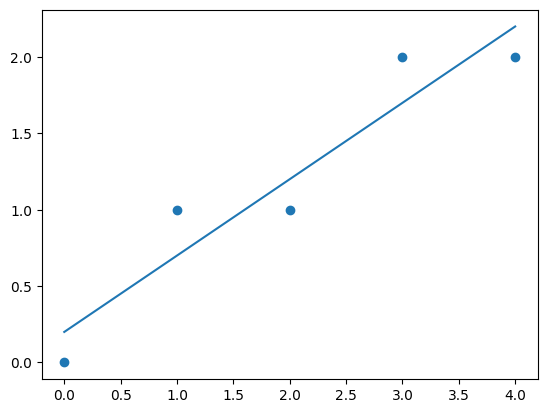

In [12]:
x_axis = np.linspace(0, 4, 50)
plt.plot(x_axis, f(x_axis, (solution[a], solution[b])))
plt.scatter(xs, ys)
plt.show()

In [18]:
#zad 2
import pandas as pd

df = pd.read_csv('CO_2_data.csv')
df

,year,co2
0,1940,4.85
1,1941,4.97
2,1942,4.95
3,1943,5.04
4,1944,5.11
...,...,...
78,2018,36.83
79,2019,37.08
80,2020,35.26
81,2021,37.12


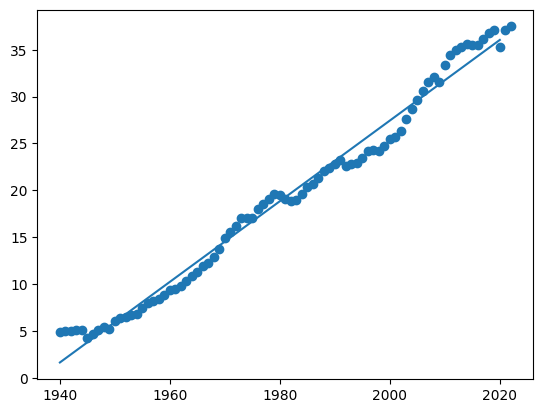

In [25]:
x_col = df['year']
y_col = df['co2']

f_co2 = 0
for i in range(x_col.size):
    f_co2 += (f(x_col[i], (a, b)) - y_col[i]) ** 2

expand(fi)
solution2 = solve ([ Eq(diff(f_co2,a), 0), Eq(diff(f_co2, b), 0) ])

x_axis = np.linspace(1940, 2020, 50)
plt.plot(x_axis, f(x_axis, (solution2[a], solution2[b])))
plt.scatter(x_col, y_col)
plt.show()


In [37]:
#zad 3
a1, a2, a3, a4 = symbols('a1, a2, a3, a4')

table =pd.read_csv('wind_turbine_data_sample.csv') 
x_3 = table['wind speed']
y_3 = table['power output']

def f3(x, params):
    a1, a2, a3, a4 = params
    return a1*(x**3) + a2*(x**2) + a3*x + a4

f_3 = 0
for i in range(x_3.size):
    f_3 += (f3(x_3[i], (a1, a2, a3, a4)) - y_3[i]) ** 2

expand(f_3)
solution3 = solve([Eq(diff(f_3, a1), 0), 
                   Eq(diff(f_3, a2), 0),
                   Eq(diff(f_3, a3), 0),
                   Eq(diff(f_3, a4), 0)])

x_axis = np.linspace(5, 13, 1000)
plt.plot(x_axis, f3(x_axis, (solution3[a1], solution3[a2], solution3[a3], solution3[a4])), 'r-')
plt.scatter(x_3, y_3)
plt.show()

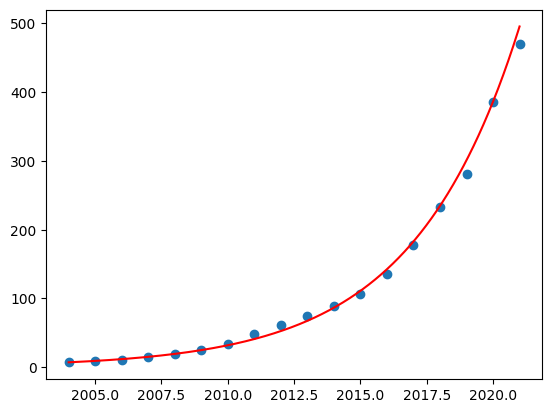

In [16]:
#zad 4 
import pandas as pd
from sympy import diff, symbols, Eq, solve
import numpy as np
import matplotlib.pyplot as plt

table = pd.read_csv('amazon_sales_net_revenue.csv')
x_4 = table['year']
y_4 = table['revenue']

c, b = symbols('c, b')

def f4(x):
    return c + b*x

e4 = 0
for i in range(x_4.size):
    e4 += (f4(x_4[i]) - np.log(y_4[i])) ** 2 

solution = solve([Eq(diff(e4, c), 0), Eq(diff(e4, b), 0)])

def new_f4(x):
    return np.e**(solution[c] + solution[b]*x)

plt.scatter(x_4, y_4)
x_axis = np.linspace(np.min(x_4), np.max(x_4), 1000)
plt.plot(x_axis, new_f4(x_axis), '-r')
plt.show()